# Training and running a linear model using Scikit-Learn

### Model-based learning

One way to generalize from a set of examples is to build a model of these examples and then use that model to make predictions.

For example, suppose that we want to study if the temperature of the Earth is releashonship with the depth. Using data exaple from ChatGpt. Lets plot the data.


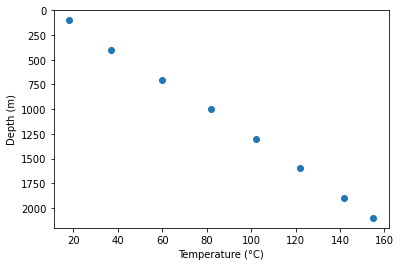

In [82]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.linear_model


# Read File
with open("prof_temp.txt", "r") as file: 
    next(file)
    depth = []
    temperature = []
    for line in file: 
        D, T = line.strip().split(",")
        depth.append(int(D))
        temperature.append(int(T))

#print("Depths:", depth)
#print("Temperatures:", temperature)  

depth =  np.array(depth)
temperature =  np.array(temperature)

# plot the data
plt.scatter(temperature, depth)
plt.ylabel('Depth (m)')
plt.xlabel('Temperature (°C)')
plt.gca().invert_yaxis()  # Invertir el eje Y

plt.show()

There does seem to be a trend here. Although the data is noisy, it looks like temperature goes up more or less linearly as the depth increases. So, we can decide to model temperature as a linear function of depth (Model selection):

$\text{Temperature} = \theta_0 + \theta_1 \times \text{Depth}$

This model has two model parameters, $\theta_0$ and $\theta_1$. By tweaking these parameters, you can make your model represent any linear function.

The Linear Regression algorithm comes in; it finds the parameters that make the linear model fit best to your data. This is called training the model.

In [83]:
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(depth.reshape(-1, 1), temperature.reshape(-1, 1) )

#predict
d_new = [[850]] 
tpredict = model.predict(d_new)

For example, now we predict the temperature of the crust at 850 meters depth, and then we plot the measured points, the predicted value, and the dashed line.

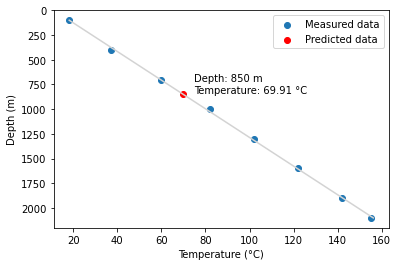

In [84]:
plt.scatter(temperature, depth, label='Measured data')
plt.scatter(tpredict, d_new, color='red', label='Predicted data')  
plt.plot(model.predict(depth.reshape(-1, 1)), depth, color='lightgrey') 
plt.text(5+np.array(tpredict), 5+np.array(d_new), f'Depth: {np.array(d_new)[0][0]} m\nTemperature: {np.array(tpredict)[0][0]:.2f} °C', ha='left', va='bottom')  
plt.ylabel('Depth (m)')
plt.xlabel('Temperature (°C)')
plt.gca().invert_yaxis() 
plt.legend()
plt.show()